In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv("../Resources/H1N1_dataset.csv")
data.head()


,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/


In [2]:
data_df = data[["Date", "Country", "Cumulative no. of cases", "Cumulative no. of deaths"]]
data_df

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
0,2009-04-24,Mexico,18,0
1,2009-04-24,United States of America,7,0
2,2009-04-26,Mexico,18,0
3,2009-04-26,United States of America,20,0
4,2009-04-27,Canada,6,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [3]:
len(data_df.Country.unique())

148

In [4]:
data_df = data_df.rename(columns={"Cumulative no. of cases": "Total Cases", "Cumulative no. of deaths": "Total Deaths"})
data_df

,Date,Country,Total Cases,Total Deaths
0,2009-04-24,Mexico,18,0
1,2009-04-24,United States of America,7,0
2,2009-04-26,Mexico,18,0
3,2009-04-26,United States of America,20,0
4,2009-04-27,Canada,6,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [5]:
date_df = data_df.groupby('Country')['Date'].agg(['min','max']).rename(columns={'min':'first','max':'last'})
date_df

,first,last
Country,,
Algeria,2009-06-22,2009-07-06
Antigua and Barbuda,2009-06-24,2009-07-06
Argentina,2009-05-09,2009-07-06
Australia,2009-05-09,2009-07-06
Austria,2009-04-29,2009-07-06
...,...,...
Venezuela,2009-06-01,2009-07-06
Viet Nam,2009-06-01,2009-07-06
Virgin Islands,2009-07-06,2009-07-06


In [6]:
data_df["Date"] = pd.to_datetime(data_df["Date"])

In [7]:
total_df = data_df.loc[data_df.groupby('Country').Date.idxmax()]
total_df


,Date,Country,Total Cases,Total Deaths
2355,2009-07-06,Algeria,5,0
2356,2009-07-06,Antigua and Barbuda,2,0
2357,2009-07-06,Argentina,2485,60
2358,2009-07-06,Australia,5298,10
2359,2009-07-06,Austria,19,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [8]:
sum_death = total_df["Total Deaths"].sum()
sum_total = total_df["Total Cases"].sum()
print(f"Global total deaths: {sum_death}")
print(f"Global total cases: {sum_total}")

Global total deaths: 429
Global total cases: 94577


<BarContainer object of 2 artists>

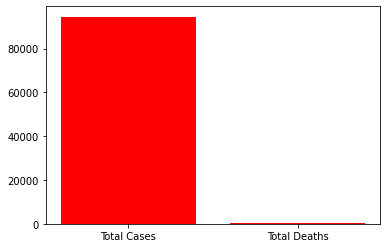

In [9]:
global_total = total_df["Total Cases"].sum ()
global_death = total_df["Total Deaths"].sum()

global_data = [global_total, global_death]

xaxis = np.arange(len(global_data))

plt.bar(xaxis, global_data, color='r', alpha=1, align="center", tick_label=("Total Cases", "Total Deaths"))
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")


([<matplotlib.patches.Wedge at 0x7ff9e3bedeb8>,
 [Text(-1.099889319181663, 0.015604023522730952, 'Total Cases'),
  Text(1.0998893179946347, -0.0156041071932244, 'Total Deaths')],
 [Text(-0.5999396286445434, 0.008511285557853245, '99.5%'),
  Text(0.5999396279970733, -0.008511331196304218, '0.5%')])

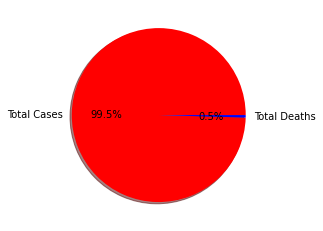

In [10]:
labels = ["Total Cases", "Total Deaths"]

sizes = [global_total, global_death]

# The colors of each section of the pie chart
colors = ["red", "blue"]


plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)


In [11]:
sorted_total_df = total_df.sort_values(by=['Total Cases'], ascending=False)
top_10 = sorted_total_df.iloc[0:10,:]
top_10

,Date,Country,Total Cases,Total Deaths
2482,2009-07-06,United States of America,33902,170
2431,2009-07-06,Mexico,10262,119
2373,2009-07-06,Canada,7983,25
2481,2009-07-06,United Kingdom,7447,3
2376,2009-07-06,Chile,7376,14
2358,2009-07-06,Australia,5298,10
2357,2009-07-06,Argentina,2485,60
2473,2009-07-06,Thailand,2076,7
2377,2009-07-06,China,2040,0
2416,2009-07-06,Japan,1790,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

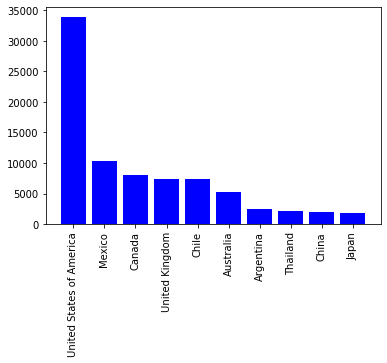

In [12]:
countries_10 = top_10["Country"]
total_cases_10 = top_10["Total Cases"]

plt.bar(countries_10, total_cases_10, color='b', alpha=1, align="center")
plt.xticks(rotation='vertical')
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")

In [13]:
sorted_death_df = total_df.sort_values(by=['Total Deaths'], ascending=False)
top_10_deaths = sorted_death_df.iloc[0:10,:]
top_10_deaths

,Date,Country,Total Cases,Total Deaths
2482,2009-07-06,United States of America,33902,170
2431,2009-07-06,Mexico,10262,119
2357,2009-07-06,Argentina,2485,60
2373,2009-07-06,Canada,7983,25
2376,2009-07-06,Chile,7376,14
2358,2009-07-06,Australia,5298,10
2473,2009-07-06,Thailand,2076,7
2483,2009-07-06,Uruguay,195,4
2481,2009-07-06,United Kingdom,7447,3
2380,2009-07-06,Costa Rica,277,3


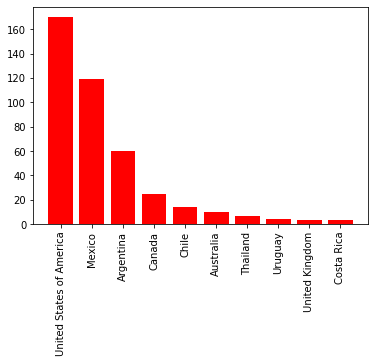

In [14]:
countries_deaths_10 = top_10_deaths["Country"]
total_deaths_10 = top_10_deaths["Total Deaths"]
total_cases_10_2 = top_10_deaths["Total Cases"]

# indx = np.arange(len(countries_deaths_10))

# bar_width = 0.25

# fig, ax = plt.subplots()
# bar_total = ax.bar(indx-bar_width/2, total_deaths_10, bar_width, label="Top 10 deaths")
# bar_death = ax.bar(indx+bar_width/2, total_cases_10_2, bar_width, label="Top 10 total")

plt.bar(countries_deaths_10, total_deaths_10, color='r', alpha=1, align="center")
plt.xticks(rotation='vertical')
plt.show()
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")

In [15]:
population1 = data_df[data_df["Country"] == "Mexico"]
population1["Total Cases"].mean()

3722.12

In [16]:
population2 = data_df[data_df["Country"] == "United States of America"]
population2["Total Cases"].mean()

8370.64

In [17]:
stats.ttest_ind(population1["Total Cases"], population2["Total Cases"], equal_var=False)

Ttest_indResult(statistic=-3.3986408799299217, pvalue=0.0012209694207049055)

In [18]:
population = data_df["Total Cases"]
sample = data_df[data_df["Country"] == "Canada"]
stats.ttest_1samp(sample["Total Cases"], population.mean())


Ttest_1sampResult(statistic=4.040468279057268, pvalue=0.00019611476626483942)

In [20]:
grouped_data = data_df.groupby("Date").sum()
grouped_data_df = grouped_data.reset_index()
grouped_data_df.head()

,Date,Total Cases,Total Deaths
0,2009-04-24,25,0
1,2009-04-26,38,0
2,2009-04-27,73,7
3,2009-04-28,105,7
4,2009-04-29,149,8


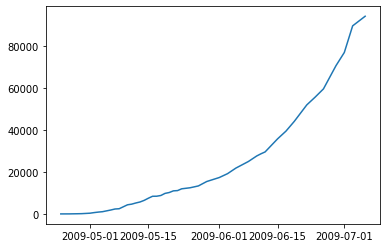

In [21]:
plt.plot(grouped_data_df["Date"], grouped_data_df["Total Cases"])
plt.show()

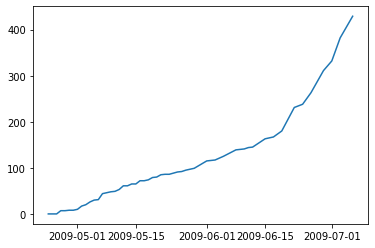

In [23]:
plt.plot(grouped_data_df["Date"], grouped_data_df["Total Deaths"])
plt.show()